# Problem Statement

You work at a consumer finance company which specialises in lending various types of loans to urban customers.
The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilize this knowledge for its portfolio and risk assessment.


In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [152]:
# Read the CSV
df = pd.read_csv("loan.csv")

/var/folders/3_/5k_prtvs1lb1qf0z8yx8qnfh0000gn/T/ipykernel_1122/2042666052.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


In [153]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [154]:
# Look at info df dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [155]:
# Look at the description of the columns
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [222]:
# Looks like there may be many null values in some columns, taking a look at null values in columns
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [158]:
# Look for all columns that have significant number of null values
nullSumColumn = df.isnull().sum()
nullSumColumn[nullSumColumn>10000]

desc                              12942
mths_since_last_delinq            25682
mths_since_last_record            36931
next_pymnt_d                      38577
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717


In [159]:
# Let's drop all columns that have more than 12000 null values
df1 = df.drop(nullSumColumn[nullSumColumn>12000].index, axis=1)

In [160]:
# Look at columns with more than 5000 null values
nullSumColumn = df1.isnull().sum()
nullSumColumn[nullSumColumn>5000]

Series([], dtype: int64)

In [161]:
# All columns with many null values have been dropped
# Lets look at columns with null values
nullSumColumn[nullSumColumn>1]/df1.shape[0]*100

emp_title                     6.191303
emp_length                    2.706650
title                         0.027696
revol_util                    0.125891
last_pymnt_d                  0.178765
last_credit_pull_d            0.005036
collections_12_mths_ex_med    0.140998
chargeoff_within_12_mths      0.140998
pub_rec_bankruptcies          1.754916
tax_liens                     0.098195
dtype: float64

In [162]:
# Looking at values in each left over column
print(df1.emp_title.head())
 
print(df1.emp_title.describe())
 
print(df1.emp_title.value_counts())


0                         NaN
1                       Ryder
2                         NaN
3         AIR RESOURCES BOARD
4    University Medical Group
Name: emp_title, dtype: object
count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object
emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64


#### Dropping emp_title since it has a lot of NaN values and lot fo unique entries, might not provide good insight

In [163]:
df1 = df1.drop(['emp_title'], axis=1)

In [164]:
print(df1.emp_length.head())
 
print(df1.emp_length.describe())
 
print(df1.emp_length.value_counts())


0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object
count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object
emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64


#### Let's fill the nan values with the most common value

In [165]:
df1['emp_length'].mode()[0]

'10+ years'

In [166]:
df1['emp_length'] = df1['emp_length'].fillna(df1['emp_length'].mode()[0])

In [167]:
df1.isnull().sum()[df1.isnull().sum()>1]

title                          11
revol_util                     50
last_pymnt_d                   71
last_credit_pull_d              2
collections_12_mths_ex_med     56
chargeoff_within_12_mths       56
pub_rec_bankruptcies          697
tax_liens                      39
dtype: int64

#### Let's clean the data to just have the number for years

In [168]:
import re
digitPattern = re.compile("[^\d]+", re.IGNORECASE)
def cleanEmpLength(x):
    return int(re.sub(digitPattern, "", x))

In [169]:
df1['emp_length'] = df1['emp_length'].apply(cleanEmpLength)

In [170]:
df1['emp_length'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: emp_length
Non-Null Count  Dtype
--------------  -----
39717 non-null  int64
dtypes: int64(1)
memory usage: 310.4 KB


#### Checking the revol_util column

#### Since there are very less rows with null values, we can go ahead and drop them rather than introduce any bias/erros by making assumptions.

In [171]:
df2 = df1.dropna(axis=0)

In [172]:
df2.isnull().sum()[df2.isnull().sum()>1]

Series([], dtype: int64)

#### No more null values present, let's look at cleaning columns that we are planning on analysing

# Cleaning columns

In [173]:
df2.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37217
1.0     1665
2.0        7
Name: count, dtype: int64

In [174]:
# Checking the loan status columns to understand the values
df2['loan_status'].value_counts()

loan_status
Fully Paid     32327
Charged Off     5422
Current         1140
Name: count, dtype: int64

In [175]:
# remove all currently running loans as they do not speak if the loan has been defaulted or fully paid
df2  = df2[~(df2['loan_status']=='Current')]

In [176]:
df2['loan_status'].value_counts()

loan_status
Fully Paid     32327
Charged Off     5422
Name: count, dtype: int64

### Looking at interest column, let's remove interest symbol

In [177]:
def cleanInterest(x):
    return float(x[0:-1])

In [178]:
df2['int_rate'] = df2['int_rate'].apply(cleanInterest)

In [179]:
df2['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

### Clean term to only have number of months

In [180]:
df2['term'] = df2['term'].apply(lambda x:int(x[0:-7]))

In [181]:
df2['term'].head()

0    36
1    60
2    36
3    36
5    36
Name: term, dtype: int64

In [182]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37749 entries, 0 to 39623
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          37749 non-null  int64  
 1   member_id                   37749 non-null  int64  
 2   loan_amnt                   37749 non-null  int64  
 3   funded_amnt                 37749 non-null  int64  
 4   funded_amnt_inv             37749 non-null  float64
 5   term                        37749 non-null  int64  
 6   int_rate                    37749 non-null  float64
 7   installment                 37749 non-null  float64
 8   grade                       37749 non-null  object 
 9   sub_grade                   37749 non-null  object 
 10  emp_length                  37749 non-null  int64  
 11  home_ownership              37749 non-null  object 
 12  annual_inc                  37749 non-null  float64
 13  verification_status         37749 no

Let's drop columns that we are not interested infor the analysis

In [183]:
df2.pymnt_plan.value_counts()

pymnt_plan
n    37749
Name: count, dtype: int64

There may be other similar columns with only one unique value, let's drop all of them

In [184]:
for col in df2.columns:
    if len(df2[col].unique()) == 1:
        df2.drop(col,inplace=True,axis=1)

In [185]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37749 entries, 0 to 39623
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       37749 non-null  int64  
 1   member_id                37749 non-null  int64  
 2   loan_amnt                37749 non-null  int64  
 3   funded_amnt              37749 non-null  int64  
 4   funded_amnt_inv          37749 non-null  float64
 5   term                     37749 non-null  int64  
 6   int_rate                 37749 non-null  float64
 7   installment              37749 non-null  float64
 8   grade                    37749 non-null  object 
 9   sub_grade                37749 non-null  object 
 10  emp_length               37749 non-null  int64  
 11  home_ownership           37749 non-null  object 
 12  annual_inc               37749 non-null  float64
 13  verification_status      37749 non-null  object 
 14  issue_d                  37

In [186]:
df2.earliest_cr_line.value_counts()

earliest_cr_line
Oct-99    357
Nov-98    352
Dec-98    334
Oct-00    334
Nov-99    311
         ... 
Sep-56      1
Jun-66      1
Jan-46      1
Dec-50      1
Oct-74      1
Name: count, Length: 524, dtype: int64

In [187]:
dateSeries = pd.to_datetime(df2['earliest_cr_line'], format='%b-%y')
df2['earliest_cr_line_m'] = dateSeries.dt.month
df2['earliest_cr_line_y'] = dateSeries.dt.year
df2.drop(['earliest_cr_line'], inplace=True, axis=1)

In [188]:
dateSeries = pd.to_datetime(df2['issue_d'], format='%b-%y')
df2['issue_m'] = dateSeries.dt.month
df2['issue_y'] = dateSeries.dt.year
df2.drop(['issue_d'], inplace=True, axis=1)

In [189]:
dateSeries = pd.to_datetime(df2['last_pymnt_d'], format='%b-%y')
df2['last_pymnt_m'] = dateSeries.dt.month
df2['last_pymnt_y'] = dateSeries.dt.year
df2.drop(['last_pymnt_d'], inplace=True, axis=1)

In [190]:
df2.revol_util.value_counts()

revol_util
0%        917
0.20%      59
31.20%     57
63%        57
40.70%     56
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: count, Length: 1088, dtype: int64

In [191]:
# Cleaning revol_util
df2['revol_util'] = df2.revol_util.apply(lambda x:float(x[:-1]))

In [192]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37749 entries, 0 to 39623
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       37749 non-null  int64  
 1   member_id                37749 non-null  int64  
 2   loan_amnt                37749 non-null  int64  
 3   funded_amnt              37749 non-null  int64  
 4   funded_amnt_inv          37749 non-null  float64
 5   term                     37749 non-null  int64  
 6   int_rate                 37749 non-null  float64
 7   installment              37749 non-null  float64
 8   grade                    37749 non-null  object 
 9   sub_grade                37749 non-null  object 
 10  emp_length               37749 non-null  int64  
 11  home_ownership           37749 non-null  object 
 12  annual_inc               37749 non-null  float64
 13  verification_status      37749 non-null  object 
 14  loan_status              37

In [193]:
# Dropping columns that we are not interested in
df3 = df2.drop(['url', 'title', 'id', 'member_id','last_credit_pull_d'],axis=1)

In [194]:
# Since we are interested in undertanding the reasons why a loan in charged off we are separating out the data into the categories
df4 = df3[df3['loan_status']=='Charged Off']
df5 = df3[df3['loan_status']=='Fully Paid']

# Univariate analysis on columns

In [195]:
def boxPlotAnalysis(fieldName):
    plt.subplot(121)
    plt.xlabel('Charged Off')
    sns.boxplot(df4[fieldName])
    plt.subplot(122)
    plt.xlabel('Fully Paid')
    sns.boxplot(df5[fieldName])
    plt.show()

def boxPlotAnalysisAnalysisRemovingOutliers(fieldName, outliers):
    plt.subplot(121)
    plt.xlabel('Charged Off')
    sns.boxplot(df4[df4[fieldName]<outliers][fieldName])
    plt.subplot(122)
    plt.xlabel('Fully Paid')
    sns.boxplot(df5[df5[fieldName]<outliers][fieldName])
    plt.show()

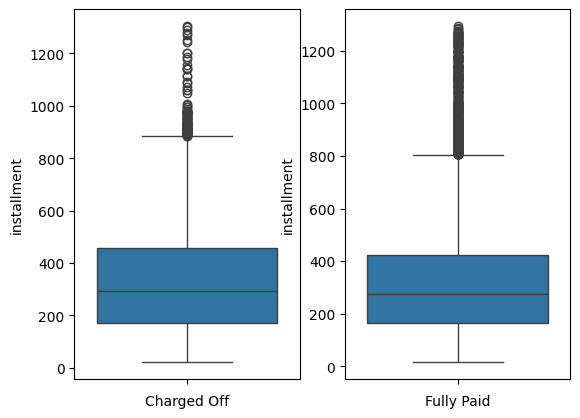

In [196]:
boxPlotAnalysis('installment')

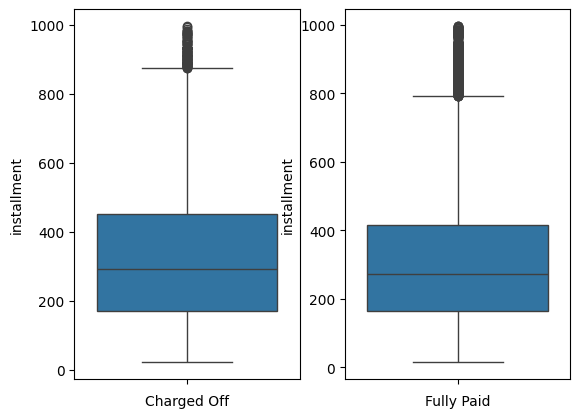

In [197]:
boxPlotAnalysisAnalysisRemovingOutliers('installment', 1000)

### Results

Looking at the above graphs we see that while the 25th Percentile is almost the same for the borrowers in both categories, the 75th Percentile and the fence for Fully paid is lower than Borrower's who were charged off.

Higher Installment values increase risk of default, this could be because higher installments might not be sustainable for a many people

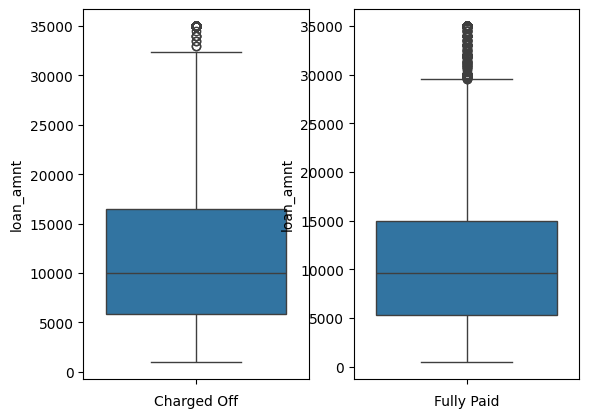

In [198]:
boxPlotAnalysis('loan_amnt')

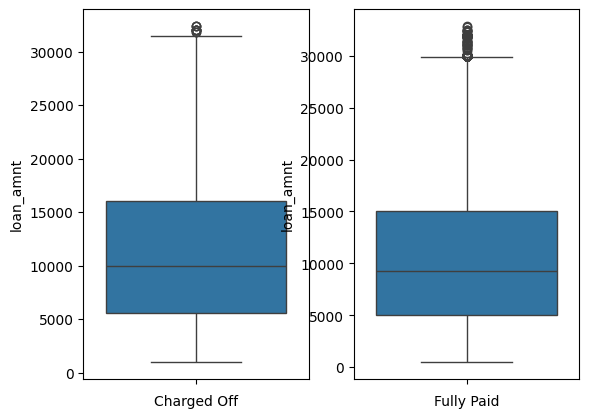

In [199]:
boxPlotAnalysisAnalysisRemovingOutliers('loan_amnt', 33000)

In [200]:
# Describe Charged off Loan amount
df4[df4['loan_amnt']<33000]['loan_amnt'].describe()

count     5264.000000
mean     11472.843845
std       7175.226910
min       1000.000000
25%       5600.000000
50%      10000.000000
75%      16000.000000
max      32400.000000
Name: loan_amnt, dtype: float64

In [201]:
# Describe Fully Paid Loan amount
df5[df5['loan_amnt']<33000]['loan_amnt'].describe()

count    31833.000000
mean     10527.873590
std       6619.184976
min        500.000000
25%       5025.000000
50%       9250.000000
75%      15000.000000
max      32875.000000
Name: loan_amnt, dtype: float64

### Results

While not very significant, there seems to be a small relation between loan_amnt and being Charged Off.

The values at the 25th percentile, 50th percentile and the 75th percentile are all higher in the case of Charged Off, versus the Fully Paid section
This could be because the larger loan amount is harder to close/takes longer to close and opens it up to uncertainity

### Comparing Interest rates

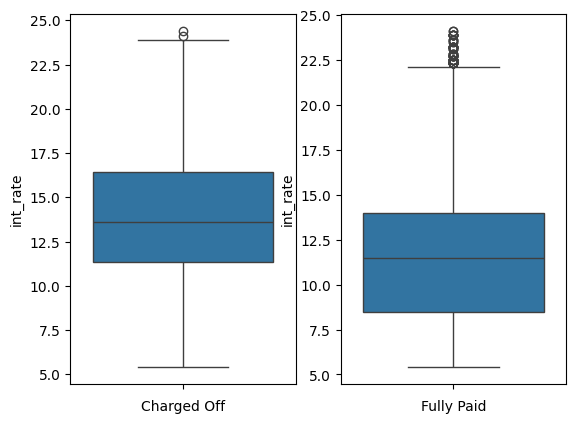

In [202]:
boxPlotAnalysis('int_rate')

### Result

There is a very clear co-relation here. Loans that have been charged off have had high interest rates

### Result

There does not seem to be a clear distribution difference between charged off and fully paid in employemnt length

### Comparing Zip codes
Let's see if there is any zip code that is higher risk than others

In [203]:
# Looking at top 20 charged off zip codes
valueCountsOfChargedOffZipCodes = df4.zip_code.value_counts(normalize=True)
valueCountsOfChargedOffZipCodes =valueCountsOfChargedOffZipCodes

In [204]:
valueCountsOfFullyPaidZipCodes = df5.zip_code.value_counts(normalize=True)
valueCountsOfFullyPaidZipCodes =valueCountsOfFullyPaidZipCodes


In [205]:
totalLoansTakenByZipcode = df3.zip_code.value_counts(normalize=True)
totalLoansTakenByZipcode = totalLoansTakenByZipcode

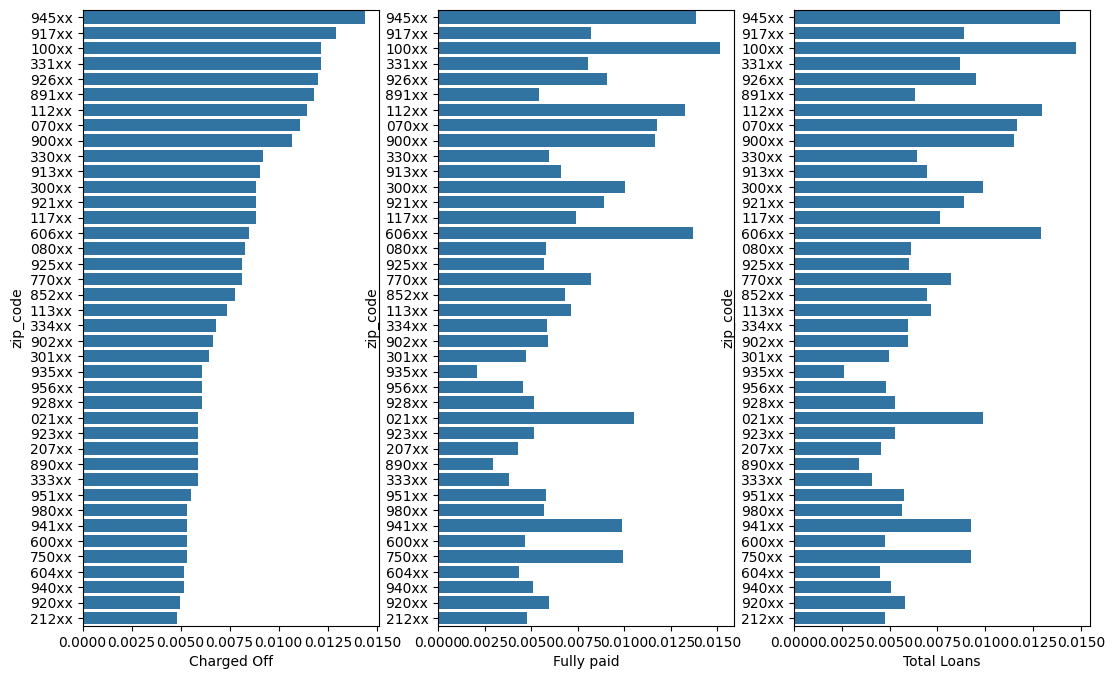

In [206]:
plt.figure(figsize=(13,8))
plt.subplot(131)
sns.barplot(valueCountsOfChargedOffZipCodes, orient='h', order=valueCountsOfChargedOffZipCodes.index[0:40])
plt.xlabel('Charged Off')
plt.subplot(132)
sns.barplot(valueCountsOfFullyPaidZipCodes, orient='h',order=valueCountsOfChargedOffZipCodes.index[0:40])
plt.xlabel('Fully paid')
plt.subplot(133)
sns.barplot(totalLoansTakenByZipcode, orient='h',order=valueCountsOfChargedOffZipCodes.index[0:40])
plt.xlabel('Total Loans')

plt.show()

### Result
The above chart has been written to check if there are any insights that can be drawn from the top 20 charged off locations.

Some of the locations seem to be more riskier than others because even though the total number of loans that have been taken are lower than other indexes they feature in the top 20 Charged off loan lists.
Zip codes like 301xx, 890xx, 891xx, 330xx are high risk because they seem to have disproportionate number of chargeoffs compared to the percentage of loans that are given/fully paid.

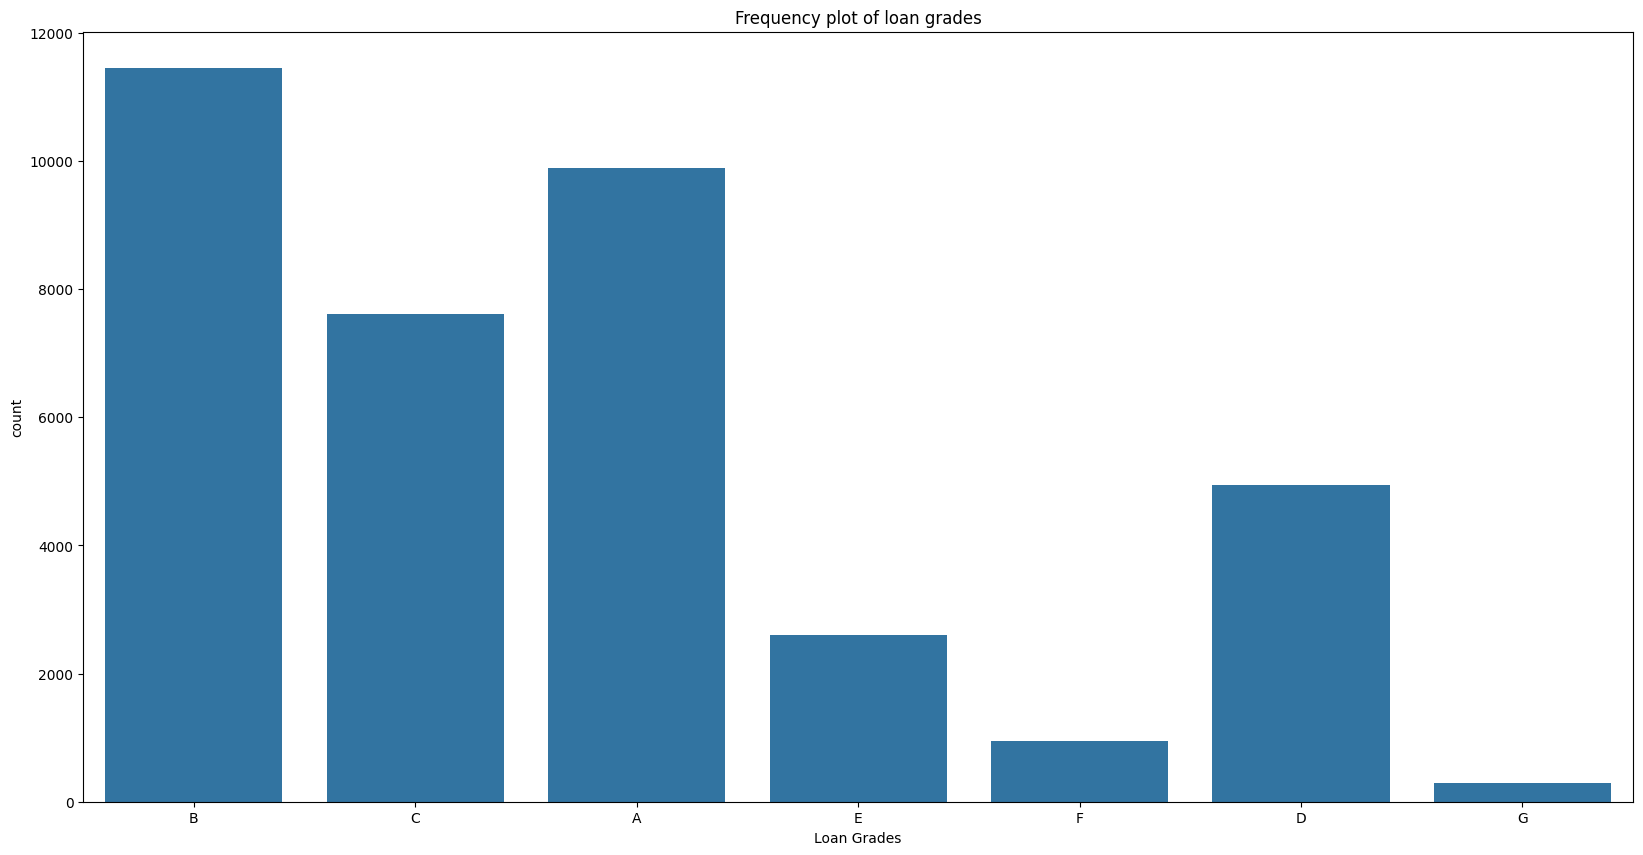

In [207]:
####Analysis on grade column

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.countplot(x='grade', data=df2)
plt.title("Frequency plot of loan grades")
plt.xlabel('Loan Grades')
plt.show()

### Results
Majority of loans were given to grade-b followed by grade a and c

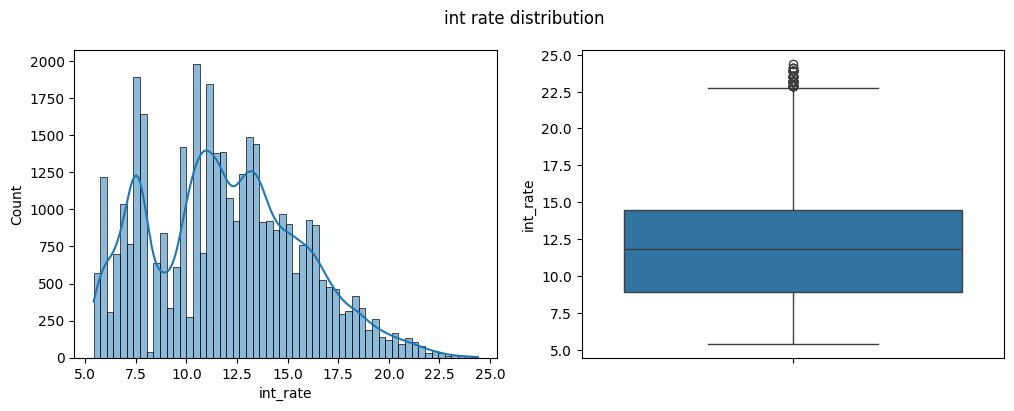

In [208]:
##Checking out int_rate trend
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df2.int_rate, kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df2.int_rate)
plt.suptitle('int rate distribution')
plt.show()

### Results
Most of the interest lies in between 9-14%, couple of them did take 22% 


Text(0.5, 1.0, 'Purpose vs Int_Rate')

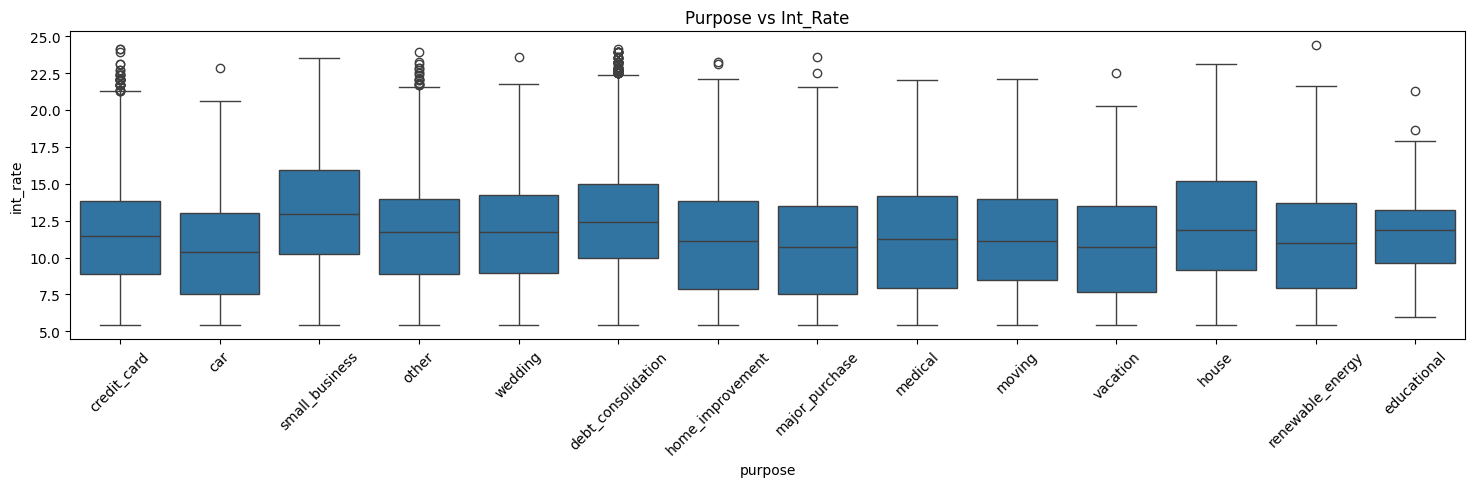

In [209]:
plt.figure(figsize=(18,4))
sns.boxplot(x='purpose', y=df2.int_rate, data=df2)
plt.xticks(rotation=45)
plt.title('Purpose vs Int_Rate')

small_business , debt_consolidation and house are higher higher int_rate


Text(0.5, 1.0, 'loan_status vs dti')

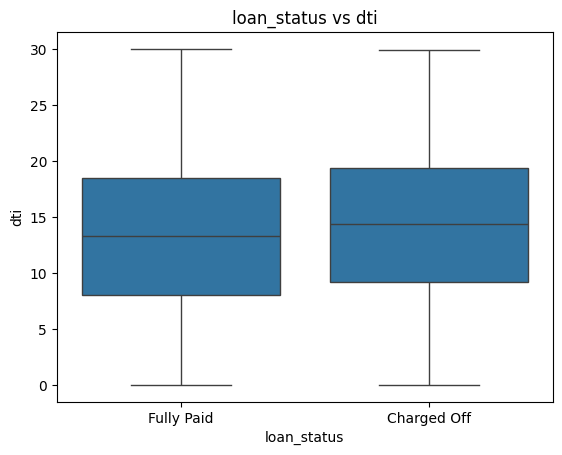

In [210]:
sns.boxplot(x='loan_status', y=df3.dti, data=df3)
plt.title('loan_status vs dti')

Higher the DTI higher the chance of defaulting


## Bivariant Analysis


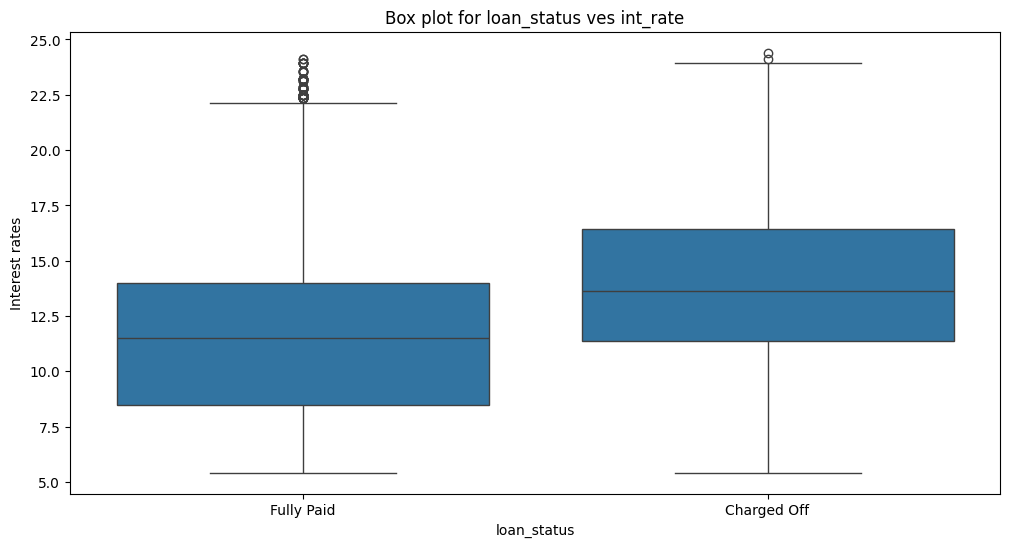

In [211]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.boxplot(y='int_rate', x='loan_status', data=df3)
plt.title('Box plot for loan_status ves int_rate')
plt.ylabel('Interest rates')
plt.show()

####Results
We can see that higher the interest rate more the chances of loan getting charged_off

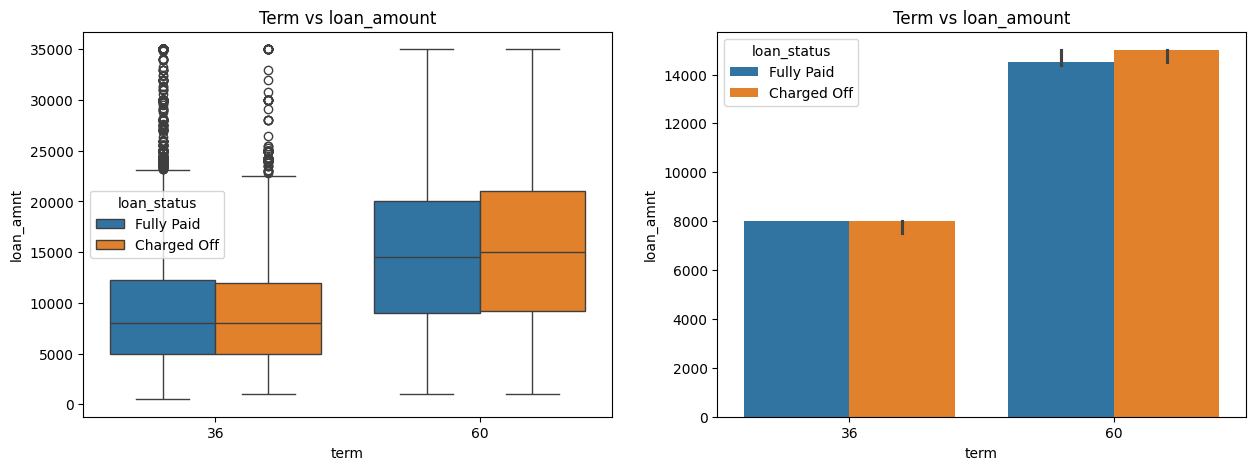

In [212]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=df3)
plt.title('Term vs loan_amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=df3, estimator=np.median)
plt.title('Term vs loan_amount')
plt.show()

Loan amount be in 36 or 60 months is not a decider for defaults.
Borrowers have equal distribution in both

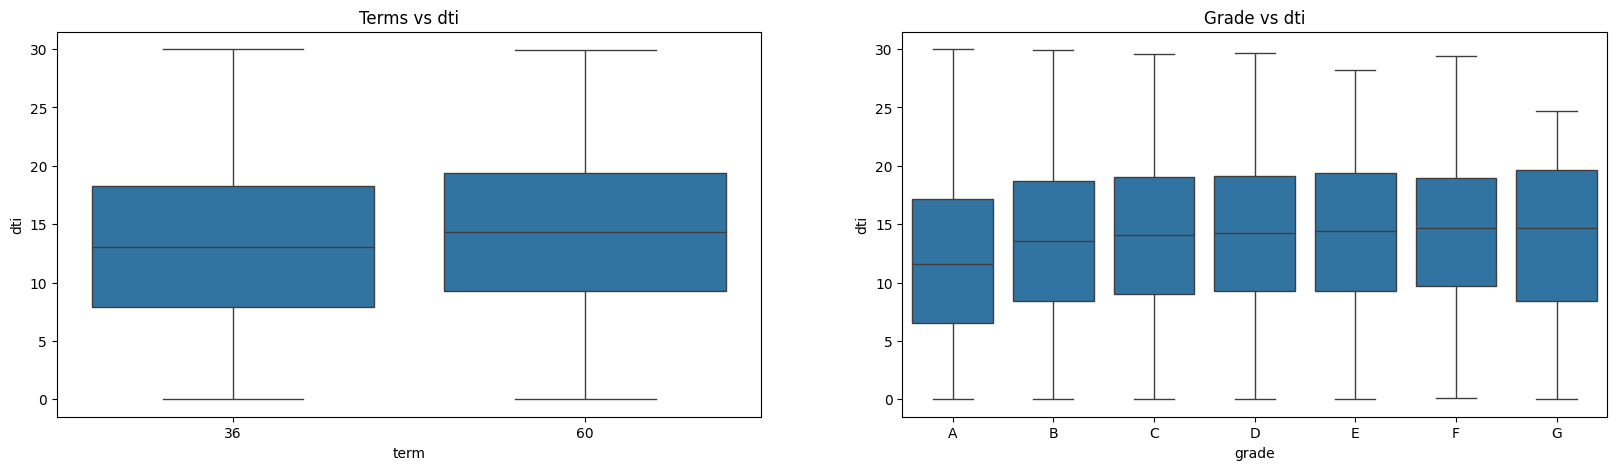

In [220]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Terms vs dti
sns.boxplot(x='term', y='dti', data=df2, ax=axs[0])
axs[0].set_title('Terms vs dti')
#  Grade vs dti
grade_order = df2.grade.unique()
grade_order.sort()
sns.boxplot(x='grade', y='dti', order=grade_order, data=df2, ax=axs[1])
axs[1].set_title('Grade vs dti')
plt.show()

DTI is higher for folks who get more tenure & expect for Grade A with higher DTI all other have more chances of default given DTI is high

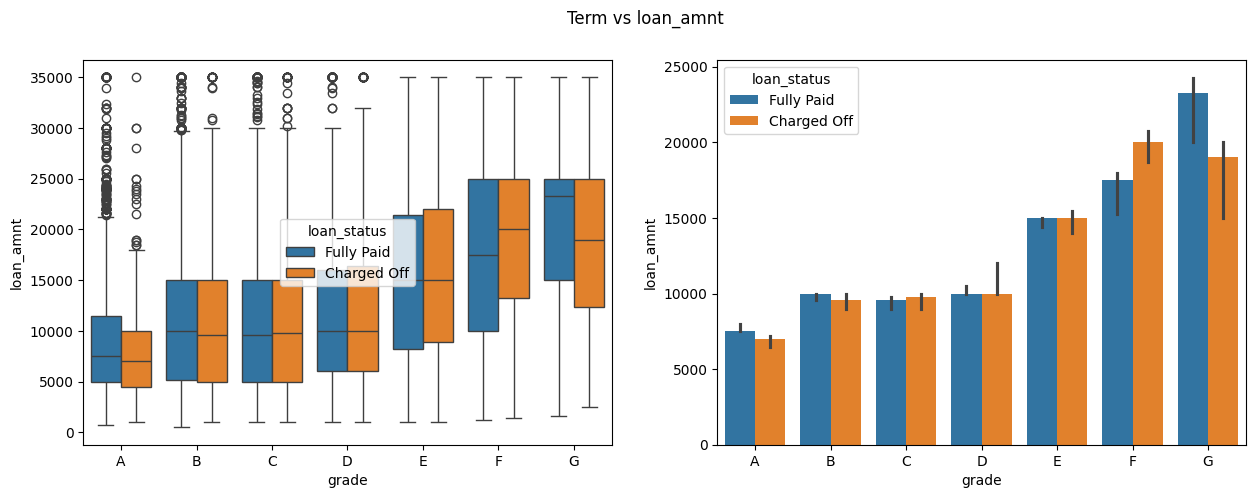

In [221]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=df2, order = grade_order)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=df2, estimator=np.median, order = grade_order)
plt.suptitle('Term vs loan_amnt')
plt.show()

As of above lower grade people have higher loan and are prone to more chances of defaulting


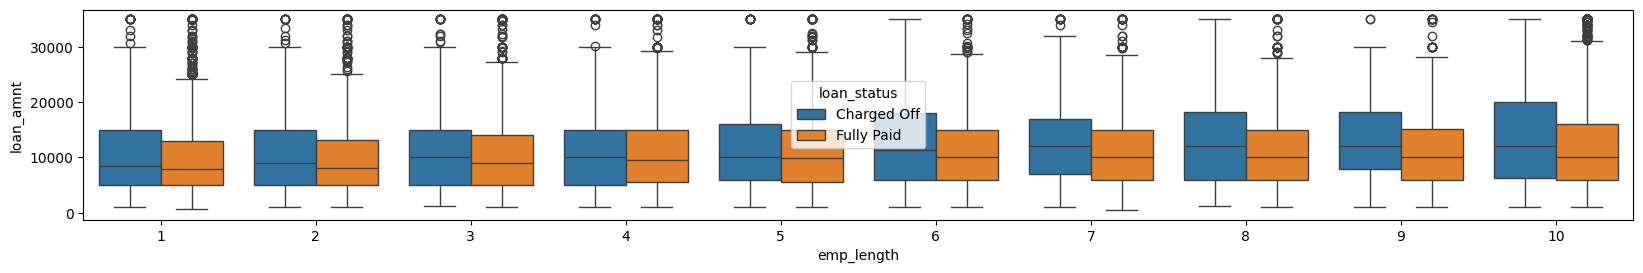

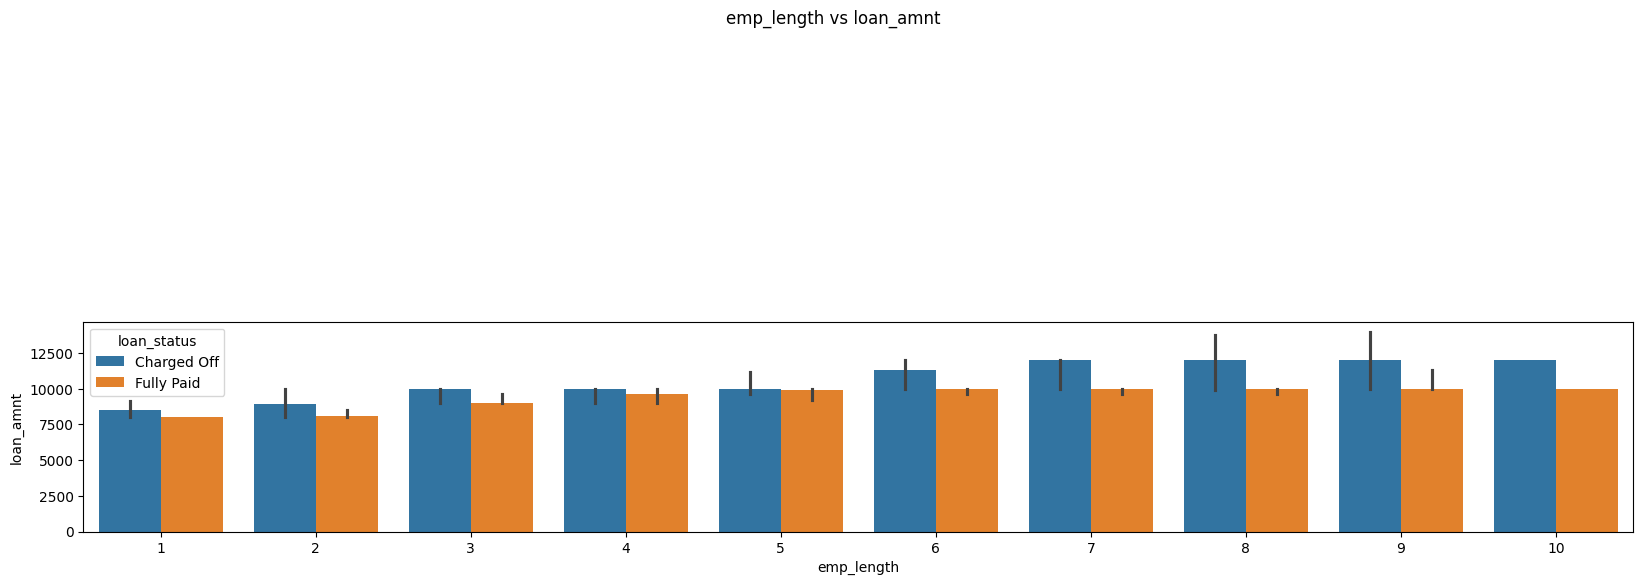

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=df2)
plt.figure(figsize=(20,6))
plt.subplot(212)
plt.suptitle('emp_length vs loan_amnt')
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=df2, estimator=np.median)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

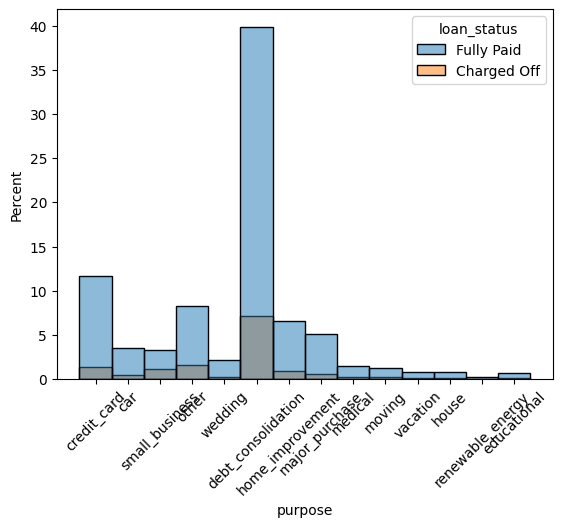

In [ ]:
sns.histplot(df3,x='purpose', hue='loan_status', stat='percent')
plt.xticks(rotation=45)

Borrowers having higher months of employememt followed taking higher loans are likely to default


# Conclusion

#### Driving Factors

1. Interest Rate
2. Debt to Income
3. Revolving Credit Utilization
4. Tenure of loan
5. Amount Funded to customer

#### Business Suggesstions

1. Reduce loans given to lower grade consumers
2. Reduce Loan amount approved to lower grade consumers, best to keep it under $15000.
3. Small Businesses and Debt Consolidation has the highest interest rates and they are the highest charged off ones as well. Reduce number of loans approved for Debt Consolidation and more loans can be given under house purpose as it seems to have high interest rates and pay off rates
4. Push for longer tenure and reduce installment value as tenure seems to not affect if the loan is charged off, but higher the installment value greater is the chance of the loan being charged off.
5. Lower the ceiling of loans provided to customers who have greater than 10 years experience. They may not be able to pay in case they face any issues in their company etc.

